In [93]:
execfile('/home/feng/meta/header_0903.py')
bwMeta = pyutil.readData('/home/feng/meta/meta_chip.tsv')


[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


is in ipython: 1 
[WARN]No module named jinja2_util
is in ipython: 1 
[WARN]No module named jinja2_util


    6129 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S10/1283-pICE1-22C_S10_Ath-TAIR10_peaks.narrowPeak
    6474 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S11/1283-pICE1-22C-CHX_S11_Ath-TAIR10_peaks.narrowPeak
   14211 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S12/1283-pICE1-4C_S12_Ath-TAIR10_peaks.narrowPeak
   15750 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S14/1489-27_S14_Ath-TAIR10_peaks.narrowPeak
    3868 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S15/INPUT-ATH_S15_Ath-TAIR10_peaks.narrowPeak
   38653 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S1/CAMTA2-22C_S1_Ath-TAIR10_peaks.narrowPeak
   28429 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S2/CAMTA2-22C-CHX_S2_Ath-TAIR10_peaks.narrowPeak
   18946 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S3/CAMTA2-4C_S3_Ath-TAIR10_peaks.narrowPeak
   28032 /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S4/CAMTA3-123-22C_S4_Ath-TAIR10_peaks.narrowPeak
   20619 /home/feng/data/sy

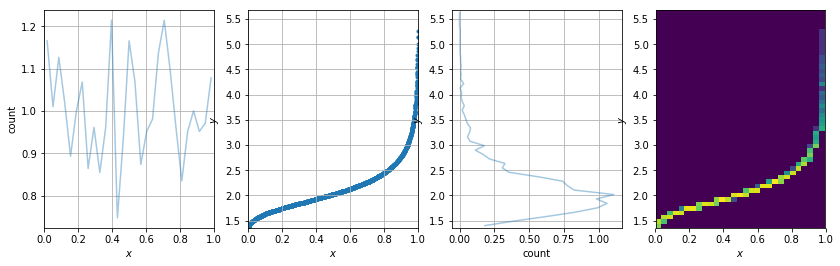

In [88]:
peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

! wc -l {' '.join(peaks)}
! cat {' '.join(peaks)} > 194C_all.narrowPeak


cutoff= 0.9

ofname = '194C_all.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print ofname
bedFile = ofname 

In [92]:
bwCurr = bwMeta.query('bname.str.contains("1283|1284|ICE1|CAMTA")')


DataAcc
141CS15    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
141CS14    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
141CS17    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
141CS16    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
189CS1     /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
189CS2                                                   NaN
189CS3                                                   NaN
189CS4     /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
189CS5                                                   NaN
189CS6     /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
189CS7     /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
189CS8                                                   NaN
189CS9     /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS10    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS11    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS12    /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS1     /home

In [288]:
%%writefile /home/feng/figureScript/1121__makePeak__ICE1-all.py

execfile("/home/feng/meta/header__script2figure.py")
ofname = '141C_ICE1.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="141C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1121__makePeak__ICE1-all.py


In [ ]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__ICE1-all.py"

In [298]:
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="194C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
bwCurr

,bamAcc,bamFinal,bname,fname,runID,sampleID,RPKMFile,hasRPKMFile,npkFile
DataAcc,,,,,,,,,
194CS10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1283-pICE1-22C_S10_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1283-pICE1-22C-CHX_S11_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1283-pICE1-4C_S12_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS1,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA2-22C_S1_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S1,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS2,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA2-22C-CHX_S2_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S2,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS3,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA2-4C_S3_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S3,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS4,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA3-123-22C_S4_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S4,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS5,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA3-123-22C-CHX_S5_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S5,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
194CS6,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,CAMTA3-123-4C_S6_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,194C,S6,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...


In [294]:
%%writefile /home/feng/figureScript/1121__makePeak__194C-all.py

execfile("/home/feng/meta/header__script2figure.py")

ofname = '194C-all.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="194C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


Writing /home/feng/figureScript/1121__makePeak__194C-all.py


In [303]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__194C-all.py"
res

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--   

In [300]:
%%writefile /home/feng/figureScript/1121__makePeak__194C-4Cel.py

execfile("/home/feng/meta/header__script2figure.py")

ofname = '194C-4Cel.narrowPeak'
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="194C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
bwCurr = bwCurr.query('bname.str.contains("-4C")')
peakFiles = bwCurr.npkFile.dropna()
# peaks = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak
# bwFiles = ! find /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/*/*.narrowPeak

peakFlat=' '.join(peakFiles)
pyutil.shellexec('''
wc -l {peakFlat}
cat {peakFlat} > {ofname}
'''.format(**locals()))

cutoff= 0.9

# ofname = pyutil.sanitise_query(bwc)+'.narrowPeak'
query = 'per_FC>%s'%cutoff
dfc = sutil.extract_peak(ofname)
dfc['per_FC'] = dfc.eval("@pyutil.dist2ppf(FC)")
pyvis.qc_2var(dfc.per_FC,dfc.FC)
figs['qc_threshold'] = plt.gcf()

ofname = pyutil.sanitise_query(query) + '_' + ofname
sutil.to_tsv(dfc.query(query).drop(columns=['per_FC']),ofname)
print pyutil.lineCount(ofname),ofname
# bedFile = ofname 
execfile('/home/feng/meta/footer__script2figure.py')


res = ! curl -L "http://172.26.114.34:81/script2figure/1121__makePeak__194C-4Cel.py"
res

Overwriting /home/feng/figureScript/1121__makePeak__194C-4Cel.py


In [296]:
pyutil.ipd.display_html(pyutil.ipd.HTML('\n'.join(res)))

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0

 0 0 0 0 0 0 0 0 --:--:-- 0:00:01 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:02 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:03 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:04 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:05 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:06 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:07 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:08 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:09 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:10 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:11 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:12 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:13 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:14 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:15 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:16 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:17 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:18 --:--:-- 0
 0 0 0 0 0 0 0 0 --:--:-- 0:00:19 --:--:-- 0
original script File:
 "/home/feng/figureScript/1121__makePeak__194C-all.py"
 
Link to directory
 
 OUTPUT directory
 
 

Success: True
 
 
Link to figure:
 
 figure.html
 

 
 
runLog
 
:
 
"/home/feng/envs/server/bin/python
/home/feng/figureScript
/home/feng/envs/server/lib/python2.7
/home/feng/envs/server/lib/python2.7/plat-x86_64-linux-gnu
/home/feng/envs/server/lib/python2.7/lib-tk
/home/feng/envs/server/lib/python2.7/lib-old
/home/feng/envs/server/lib/python2.7/lib-dynload
/usr/lib/python2.7
/usr/lib/python2.7/plat-x86_64-linux-gnu
/usr/lib/python2.7/lib-tk
/home/feng/envs/server/local/lib/python2.7/site-packages
/home/feng/envs/server/lib/python2.7/site-packagesis in ipython: 0 
[WARN]No module named jinja2_util
is in ipython: 0 
[WARN]No module named jinja2_util
is in ipython: 0 
[WARN]No module named jinja2_util
is in ipython: 0 
[WARN]No module named jinja2_util
/home/feng/envs/server/local/lib/python2.7/site-packages/pymisca/vis_util.py:686: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
 ys,edg = np.histogram(xs,bins,normed=normed)
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network
[WARN] Cannot find file:key.gene
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network

wc -l /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S10/1283-pICE1-22C_S10_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S11/1283-pICE1-22C-CHX_S11_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S12/1283-pICE1-4C_S12_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S1/CAMTA2-22C_S1_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S2/CAMTA2-22C-CHX_S2_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S3/CAMTA2-4C_S3_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S4/CAMTA3-123-22C_S4_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S5/CAMTA3-123-22C-CHX_S5_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S6/CAMTA3-123-4C_S6_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S7/CAMTA3-22C_S7_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S8/CAMTA3-22C-CHX_S8_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S9/CAMTA3-4C_S9_Ath-TAIR10_peaks.narrowPeak
cat /home/feng/data/syno3_PW/ChIP-seq/Mapped_data/194C/S10/1283-pICE1-22C_S10_Ath-TAIR10_peaks.narrowPeak /home/feng/data/syno3_PW/ChIP-seq/Mapped

In [305]:
# bwMeta.query('runID=="141C"').sort_index()

In [198]:
%%writefile ~/figureScript/1119_CAMTA_194C__callDB.py
# execfile("/home/feng/meta/header__peakBW.py",)
# print __file__
# # STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT','/home/feng/envs/testserver/static')
# STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT',None)
# assert STATIC_ROOT is not None,"Bash environ is not specified:$STATIC_ROOT"
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_194C_all.narrowPeak'

peakFile = pyutil.os.path.realpath(peakFile)
# midx = '''
# 189CS10
# 189CS11
# 189CS16
# 189CS17
# '''.strip().splitlines()
# bwCurr = bwMeta.reindex(midx).fname

bwCurr = bwMeta.copy()

bwCurr = bwCurr.query('runID in ["194C"]')
bwCurr = bwCurr.query('bname.str.contains("CAMTA")')
print (peakFile)
BNAME=pyutil.basename(__file__)
DIR=pyutil.os.getcwd()


testDict = dict(
    outerRadius=500,
# innerRadius = 50,
# center_summit = 0,
    NCORE = NCORE,
    peakFile = peakFile,
# outIndexFunc = pyutil.basename,
# stepSize= 10,
bwFiles = bwCurr.fname,)


res = sjob.figs__peakBW(
    outIndexFunc=pyutil.basename,
    **testDict
                        )
figs=res[0]


### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
#     dfcc= dfc.reindex(dfc.summary.query('per_SD > 0.95').index)
    dfcc= dfc.reindex(dfc.summary.query('per_M > 0.5 & per_SD>0.5').index)
    tdfc = dfcc
#     tdfc = dfcc.reindex(dfc.summary.query('per_SD>0.9').index)
    tdfc = sutil.meanNorm(tdfc.copy())
    mdl = sutil.fit_BGM(tdfc,random_state=0)

    clu = mdl.predict()
    clu.columns = ['clu']
    pp = spanel.panelPlot([clu,tdfc,dfcc],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    
    
    ax=  pyvis.heatmap( bwTrack.reindex(clu.sort_values('clu').index ))
    # bwTrack.heatmap()
    figs['trainingPeaks'] = ax.figure
    
    #### output clustered peaks
    bed = sutil.extract_peak(peakFile).set_index('acc',drop=0)
    bed = pd.concat([bed,clu],axis=1,join='inner').sort_values('clu')
    sutil.to_tsv(bed, 'diffBind'+ '__' +peakFile.split('/')[-1] )
    
    
execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1119_CAMTA_194C__callDB.py


In [187]:
%%writefile ~/figureScript/1119_CAMTA_189C-194C__callDB.py
# execfile("/home/feng/meta/header__peakBW.py",)
# print __file__
# # STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT','/home/feng/envs/testserver/static')
# STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT',None)
# assert STATIC_ROOT is not None,"Bash environ is not specified:$STATIC_ROOT"
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_194C_all.narrowPeak'

peakFile = pyutil.os.path.realpath(peakFile)
# midx = '''
# 189CS10
# 189CS11
# 189CS16
# 189CS17
# '''.strip().splitlines()
# bwCurr = bwMeta.reindex(midx).fname

bwCurr = bwMeta.copy()

bwCurr = bwCurr.query('runID in ["189C","194C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
print (peakFile)
BNAME=pyutil.basename(__file__)
DIR=pyutil.os.getcwd()


testDict = dict(
    outerRadius=500,
# innerRadius = 50,
# center_summit = 0,
    NCORE = NCORE,
    peakFile = peakFile,
# outIndexFunc = pyutil.basename,
# stepSize= 10,
bwFiles = bwCurr.fname,)


res = sjob.figs__peakBW(
    outIndexFunc=pyutil.basename,
    **testDict
                        )
figs=res[0]


### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
    dfcc= dfc.reindex(dfc.summary.query('per_M > 0.95').index)
#     dfcc= dfc.reindex(dfc.summary.query('per_M > 0.7 & per_SD>0.7').index)
    tdfc = dfcc
#     tdfc = dfcc.reindex(dfc.summary.query('per_SD>0.9').index)
    tdfc = sutil.meanNorm(tdfc.copy())

    mdl = sutil.fit_BGM(tdfc,random_state=0)

    clu = mdl.predict()
    clu.columns = ['clu']
    pp = spanel.panelPlot([clu,tdfc,dfcc],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    
    #### output clustered peaks
    bed = sutil.extract_peak(peakFile).set_index('acc',drop=0)
    bed = pd.concat([bed,clu],axis=1,join='inner').sort_values('clu')
    sutil.to_tsv(bed, 'diffBind'+ '__' +peakFile.split('/')[-1] )
    
    
execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1119_CAMTA_189C-194C__callDB.py


In [180]:
bwCurr = bwMeta.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
bwCurr.groupby('runID').count()

,bamAcc,bamFinal,bname,fname,sampleID,RPKMFile,hasRPKMFile,npkFile
runID,,,,,,,,
141C,4,4,4,4,4,4,4,4
189C,9,9,9,9,9,9,9,5
194C,12,12,12,12,12,12,12,12


In [204]:
%%writefile ~/figureScript/1119__CAMTA__141C__chipDB.py
# execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/static/figures/1119_CAMTA_194C__callDB/diffBind__per_FC-GT-0dot9_194C_all.narrowPeak'


# peakFile = ofname
midx = '''
141CS14
141CS15
194CS5
194CS6
194CS7
'''.strip().splitlines()

bwCurr = bwMeta.copy()
bwCurr = bwCurr.reindex(midx)
# bwCurr = bwCurr.query('runID=="141C" & sampleID in ["1"]')
# bwCurr = bwCurr.query('runID=="192C"')
print (peakFile)

params = dict(
    outerRadius=500,
    NCORE = NCORE,
    outIndexFunc=pyutil.basename,
)

res = sjob.figs__peakBW(
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
                        )
figs=res[0]




bed = sutil.extract_peak(peakFile)
query = 'img==12'
qsafe = pyutil.sanitise_query(query)
ofname = pyutil.sanitise_query(query) +'.narrowPeak'
bedCurr = bed.query(query)
sutil.to_tsv(bedCurr,ofname)
peakFile = ofname

res = sjob.figs__peakBW(
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
)[0]
for k in res.keys():
    res[qsafe+'_' +k ] = res.pop(k)
    
peak2gene = pyutil.readData('/home/feng/static/figures/1119__CAMTA__194C-DB-peak2genes/job_nearAUG__peak_diffBind--per-FC-GT-0dot9-194C-all-radius=1__cutoff_4000__feat_genes.gtf.cds.tsv')
geneDF = sdio.peak2gene(peak2gene,
                        bedCurr.set_index('acc'))
geneDF[['acc','feat_acc']].to_csv(qsafe+'.csv')

figs.update(res)


execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1119__CAMTA__141C__chipDB.py


In [306]:
%%writefile ~/figureScript/1119__peakBW__141CS15__CAMTA.py
# execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")
NCORE=6
# peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_141CS15_ICE1.narrowPeak'
peakFile = '/home/feng/static/figures/1121__makePeak__ICE1-141CS15/per_FC-GT-0dot9_ICE1-141CS15.narrowPeak'


# peakFile = ofname
midx = '''
141CS14
141CS15
194CS4
194CS5
194CS6
'''.strip().splitlines()

bwCurr = bwMeta.copy()
bwCurr = bwCurr.reindex(midx)
bwCurr['header']= bwCurr.eval("@pyutil.paste0([runID, sampleID, alias],'_').tolist()")#.to_frame()
bwHeader = bwCurr.header
# bwCurr = bwCurr.query('runID=="141C" & sampleID in ["1"]')
# bwCurr = bwCurr.query('runID=="192C"')
print (peakFile)

params = dict(
    outerRadius=500,
    NCORE = NCORE,
    outIndexFunc=bwHeader.values.ravel(),
)

res = sjob.figs__peakBW(
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
    **params
)
figs=res[0]

bwTrack,bwAvg = res[1]
# bwTrack = bwTrack.apply(sutil.log2p1)
xlab = '141CS14'
ylab = '141CS15'
# print 
cols = bwHeader.reindex([xlab,ylab]).values
print bwHeader
print (bwAvg.columns)
print (cols)
tdf = bwAvg.get(cols)
xs,ys = tdf.values.T

# # tdf = sutil.meanNorm(tdf.copy())
# mdl = sutil.fit_BGM(tdf,nClu=2)
# clu = mdl.predict()

# score = pyutil.dist2ppf(mdl.model.score_samples(tdf))
# score = tdf.setDF(score)
# clu = score<0.025
# cclu = t

score = (ys - xs  > 2.30) & (ys > 8.0 )
clu_stringent = tdf.setDF(score).astype(int)
clu_stringent.columns = ['clu']

score = (ys - xs  > 1.00) & (ys > 8.0 )
clu = tdf.setDF(score).astype(int)
clu.columns = ['clu']
# clu = bwAvg.eval('141CS15-141CS14 > 0.7 & 141C15 > 7.75')
# xs,ys = tdf.values.T
pyvis.qc_2var(xs,ys,clu=clu,xlab=xlab,ylab=ylab)
figs['scatter__ICE1__141C']= plt.gcf()

ind = clu.query('clu==0').index

sutil.qc_pileUp(bwTrack.reindex(ind))
figs['pileUp__clu-EQ-0'] = plt.gcf()

pyvis.heatmap(bwTrack.reindex(ind).T)
figs['heatmap__clu-EQ-0']= plt.gcf()


ind = clu.query('clu==1').index

sutil.qc_pileUp(bwTrack.reindex(ind))
figs['pileUp__clu-EQ-1'] = plt.gcf()

pyvis.heatmap(bwTrack.reindex(ind).T)
figs['heatmap__clu-EQ-1']= plt.gcf()



GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'
featSummit='/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf.cds.summit'
# featFile='/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf.cds'

peakDF = sdio.extract_peak(peakFile).set_index('acc',drop=0).reindex(ind)
ofname = sutil.to_tsv(peakDF,'clu-EQ-1.narrowPeak')
peakSummit = sutil.npk_expandSummit(fname=ofname,center_summit=0,radius=1,)
ofname = sdio.job__nearAUG(peakSummit=peakSummit,
                           CUTOFF=4000,
                           GSIZE=GSIZE,
                           featSummit=featSummit,peakWid=100,)


ind = clu_stringent.query('clu==1').index
peakDF = sdio.extract_peak(peakFile).set_index('acc',drop=0).reindex(ind)
ofname = sutil.to_tsv(peakDF,'clu-EQ-1__stringent.narrowPeak')
peakSummit = sutil.npk_expandSummit(fname=ofname,center_summit=0,radius=1,)
ofname = sdio.job__nearAUG(peakSummit=peakSummit,
                           CUTOFF=4000,
                           GSIZE=GSIZE,
                           featSummit=featSummit,peakWid=100,)


execfile('/home/feng/meta/footer__script2figure.py')

Overwriting /home/feng/figureScript/1119__peakBW__141CS15__CAMTA.py


In [307]:
res = ! curl -L "http://172.26.114.34:81/script2figure/1119__peakBW__141CS15__CAMTA.py"
res.grep('success')

['Success: True']

In [358]:
%%writefile ~/figureScript/1119__peakBW__CAMTA__194C-4Cel.py
# execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")
NCORE=6
# peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_141CS15_ICE1.narrowPeak'
peakFile = '/home/feng/static/figures/1121__makePeak__194C-4Cel/per_FC-GT-0dot9_194C-4Cel.narrowPeak'


# peakFile = ofname
midx = '''
141CS14
141CS15
194CS1
194CS2
194CS3
194CS4
194CS5
194CS6
194CS7
194CS8
194CS9
'''.strip().splitlines()

bwCurr = bwMeta.copy()
bwCurr = bwCurr.query('runID in ["141C","189C","194C"]')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
# bwCurr = bwCurr.reindex(midx)

bwHeader = bwCurr.header
# bwCurr = bwCurr.query('runID=="141C" & sampleID in ["1"]')
# bwCurr = bwCurr.query('runID=="192C"')
print (peakFile)

params = dict(
    outerRadius=500,
    NCORE = NCORE,
    outIndexFunc=bwHeader.values.ravel(),
)

res = sjob.figs__peakBW(
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
    **params
)
figs=res[0]

keyDF= pyutil.readData('/home/feng/meta/key_ath.csv')
peak2gene = pyutil.readData('/home/feng/static/figures/1121__makePeak__194C-4Cel/job_nearAUG__peak_per-FC-GT-0dot9-194C-4Cel-radius=1__cutoff_4000__feat_genes.gtf.cds.tsv')
geneDF = sdio.gene2peak(peak2gene, keyDF)

bwTrack0,bwAvg0_peak = map(scount.countMatrix,res[1])
bwAvg0 = pyutil.colGroupMean(bwTrack0)
bwAvg0 = scount.countMatrix(bwAvg0).apply(sutil.log2p1)
# bwInd=bwCurr.query('runID=="194C"').header
bwInd = bwCurr.header
bwTrack = bwTrack0.reindex(columns=bwInd,level=0)
bwAvg = bwAvg0.reindex(columns=bwInd)

vdf = bwTrack.reindex(geneDF.acc)
vdf.index=geneDF[['acc','BioName']]
vdf.heatmap()
# plt.tight_layout()
figs['marker__heatmap__detail'] = plt.gcf()

vdf = bwAvg.reindex(geneDF.acc)
vdf.index=geneDF[['acc','BioName']]
vdf.heatmap()
# plt.tight_layout()
figs['marker__heatmap__intensity__regional'] = plt.gcf()


vdf = bwAvg0_peak.reindex(geneDF.acc)
vdf.index=geneDF[['acc','BioName']]
vdf.heatmap()
# plt.tight_layout()
figs['marker__heatmap__intensity__peak'] = plt.gcf()


midx= '''
194CS1
194CS2
194CS3
194CS4
194CS5
194CS6
'''.strip().splitlines()
bwCurr = bwMeta.copy()
bwCurr = bwCurr.reindex(midx)
# bwCurr = bwCurr.query('runID in ["141C","189C","194C"]')
# bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
tdf = bwAvg0_peak.reindex(columns=bwCurr.header)
# tdf = sutil.meanNorm(tdf)
vdf = sutil.meanNorm(tdf.copy())
vdf = vdf.reindex(geneDF.acc)
vdf.index=geneDF[['acc','BioName']]
vdf.heatmap()
# plt.tight_layout()
figs['marker__heatmap__intensity__peak'] = plt.gcf()

ofname= 'training-matrix__194C.csv'
tdf.to_csv(ofname)


if 0:

    # bwTrack = bwTrack.apply(sutil.log2p1)
    xlab = '141CS14'
    ylab = '141CS15'
    # print 
    cols = bwHeader.reindex([xlab,ylab]).values
    print bwHeader
    print (bwAvg.columns)
    print (cols)
    tdf = bwAvg.get(cols)
    xs,ys = tdf.values.T

    # # tdf = sutil.meanNorm(tdf.copy())
    # mdl = sutil.fit_BGM(tdf,nClu=2)
    # clu = mdl.predict()

    # score = pyutil.dist2ppf(mdl.model.score_samples(tdf))
    # score = tdf.setDF(score)
    # clu = score<0.025
    # cclu = t

    score = (ys - xs  > 2.30) & (ys > 8.0 )
    clu_stringent = tdf.setDF(score).astype(int)
    clu_stringent.columns = ['clu']

    score = (ys - xs  > 1.00) & (ys > 8.0 )
    clu = tdf.setDF(score).astype(int)
    clu.columns = ['clu']
    # clu = bwAvg.eval('141CS15-141CS14 > 0.7 & 141C15 > 7.75')
    # xs,ys = tdf.values.T
    pyvis.qc_2var(xs,ys,clu=clu,xlab=xlab,ylab=ylab)
    figs['scatter__ICE1__141C']= plt.gcf()

    ind = clu.query('clu==0').index

    sutil.qc_pileUp(bwTrack.reindex(ind))
    figs['pileUp__clu-EQ-0'] = plt.gcf()

    pyvis.heatmap(bwTrack.reindex(ind).T)
    figs['heatmap__clu-EQ-0']= plt.gcf()


    ind = clu.query('clu==1').index

    sutil.qc_pileUp(bwTrack.reindex(ind))
    figs['pileUp__clu-EQ-1'] = plt.gcf()

    pyvis.heatmap(bwTrack.reindex(ind).T)
    figs['heatmap__clu-EQ-1']= plt.gcf()



    GSIZE='/home/feng/ref/Arabidopsis_thaliana_TAIR10/genome.sizes'
    featSummit='/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf.cds.summit'
    # featFile='/home/feng/ref/Arabidopsis_thaliana_TAIR10/annotation/genes.gtf.cds'

    peakDF = sdio.extract_peak(peakFile).set_index('acc',drop=0).reindex(ind)
    ofname = sutil.to_tsv(peakDF,'clu-EQ-1.narrowPeak')
    peakSummit = sutil.npk_expandSummit(fname=ofname,center_summit=0,radius=1,)
    ofname = sdio.job__nearAUG(peakSummit=peakSummit,
                               CUTOFF=4000,
                               GSIZE=GSIZE,
                               featSummit=featSummit,peakWid=100,)


    ind = clu_stringent.query('clu==1').index
    peakDF = sdio.extract_peak(peakFile).set_index('acc',drop=0).reindex(ind)
    ofname = sutil.to_tsv(peakDF,'clu-EQ-1__stringent.narrowPeak')
    peakSummit = sutil.npk_expandSummit(fname=ofname,center_summit=0,radius=1,)
    ofname = sdio.job__nearAUG(peakSummit=peakSummit,
                               CUTOFF=4000,
                               GSIZE=GSIZE,
                               featSummit=featSummit,peakWid=100,)


execfile('/home/feng/meta/footer__script2figure.py')

Overwriting /home/feng/figureScript/1119__peakBW__CAMTA__194C-4Cel.py


In [359]:
%%time
res = ! curl -L "http://172.26.114.34:81/script2figure/1119__peakBW__CAMTA__194C-4Cel.py"
res.grep('success')

CPU times: user 16 ms, sys: 52 ms, total: 68 ms
Wall time: 45.1 s


In [369]:
keyDF= pyutil.readData('/home/feng/meta/key_ath.csv')

keyDF

,BioName,FullName,MajorRole
Acc,,,
AT4G16780,ATHB2,homeobox protein 2,?
AT2G18790,PHYB,phytochrome B,?
AT2G44910,ATHB4,homeobox leucine zipper protein 4,?
AT3G54040,PAR1_A,PAR1 protein,?
AT1G04180,YUC9,YUCCA 9,?
AT1G02340,HFR1,basic helix-loop-helix (bHLH) DNA-binding supe...,?
AT2G42870,PAR1_B,phy rapidly regulated 1,?
AT4G28720,YUC8,Flavin-binding monooxygenase family protein,?
AT2G46970,PIL1,phytochrome interacting factor 3-like 1,?


In [451]:
%%writefile ~/figureScript/1119__peakBW__CAMTA__194C-4Cel__sigTarg.py
# execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")
NCORE=6
# peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_141CS15_ICE1.narrowPeak'
# peakFile = '/home/feng/static/figures/1121__makePeak__194C-4Cel/per_FC-GT-0dot9_194C-4Cel.narrowPeak'
PGFile = '/home/feng/static/figures/1121__makePeak__194C-4Cel/job_nearAUG__peak_per-FC-GT-0dot9-194C-4Cel-radius=1__cutoff_4000__feat_genes.gtf.cds.tsv'.format(**locals())
peak2gene = pyutil.readData(PGFile)

keyDF= pyutil.readData('/home/feng/meta/key_ath.csv')
geneDF = sdio.gene2peak(peak2gene, keyDF)


fname = '/home/feng/static/figures/1119__peakBW__CAMTA__194C-4Cel/training-matrix__194C.csv'
chipMatrix = dfc = pyutil.readData(fname,callback=scount.countMatrix)
dfc = sutil.meanNorm(dfc)
dfc.heatmap()
figs['trainingMatrix'] = plt.gcf()

vdf =  dfc.reindex(geneDF.acc)
vdf.heatmap()
figs['trainingMatrix__marker'] = plt.gcf()

scoreName = 'score__signature' 
sigDF = dfc.reindex(geneDF.query('BioName=="COR47"').acc)
score = dfc.dot(sigDF.values.mean(axis=0)).to_frame(scoreName)
dfc.qc_Avg()

stats = pd.concat([score,dfc.summary],axis=1)
stats['isTarg'] = stats.eval('{scoreName} > 1.0 * SD and SD > 0.6'.format(**locals()))

xs = stats[['SD']]
ys = stats[[scoreName]]
clu = stats[['isTarg']]

# xs = stats['SD']
# ys = stats[scoreName]
# clu = stats[['isTarg']]

labs = geneDF.query("~acc.duplicated()").set_index('acc')['BioName']

fig,axs = plt.subplots(1,1,figsize=[8,8])
# print geneDF['BioName'].head()
# data = pd.concat(map(pd.DataFrame,[xs,ys,labs]),axis=1,join='inner')
axs = pyvis.qc_2var(xs,ys,nMax=len(xs),clu=clu,axs=[None,axs,None,None])
pyvis.add_text(xs, ys, labs= labs,
               ax=axs[1])

figs['scatter__sigScore'] = plt.gcf()

targDF = stats.query('isTarg')
# targInd = .index
vdf = dfc.reindex(targDF.index)
vdf.heatmap()
figs['trainingMatrix__targets'] = plt.gcf()

geneDF_targ = sdio.peak2gene(peak2gene,targDF)
geneDF_targ.to_csv('peakGene__CAMTA-target-bySig.csv')

execfile('/home/feng/meta/footer__script2figure.py')

Overwriting /home/feng/figureScript/1119__peakBW__CAMTA__194C-4Cel__sigTarg.py


In [452]:
%%time
res = ! curl -L "http://172.26.114.34:81/script2figure/1119__peakBW__CAMTA__194C-4Cel__sigTarg.py"
print res [-5:]

print res.grep('success')

[' [WARN] unable to simplify condName. Exception:list index out of range', '(&#39;[OUTPUT]&#39;, &#39;./figure.html&#39;)', '"', '    <pre/>', '    ']
['Success: True']
CPU times: user 8 ms, sys: 52 ms, total: 60 ms
Wall time: 5.94 s


In [446]:
res

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0',
 '100  2448  100  2448    0     0    344      0  0:00:07  0:00:07 --:--:--   499',
 '100  2448  100  2448    0     0    344      0  0:00:07  0:00:07 --:--:--   

In [264]:
bwMeta.query('runID=="111C"')

,bamAcc,bamFinal,bname,fname,runID,sampleID,RPKMFile,hasRPKMFile,npkFile
DataAcc,,,,,,,,,
111CS4,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-15_S4_raw_bowtie2_TAIR10_ensembl_nomixed,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S4,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS2,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-2_S2_raw_bowtie2_TAIR10_ensembl_nomixed,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S2,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS6,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-30-1h_S6_raw_bowtie2_TAIR10_ensembl_nomixed,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S6,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS5,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-30_S5_raw_bowtie2_TAIR10_ensembl_nomixed,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S5,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS3,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-5_S3_raw_bowtie2_TAIR10_ensembl_nomixed,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S3,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS14,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-DB27-mock22_S14_raw_bowtie2_TAIR10_ensemb...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S14,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-DB29-DCMU-27C_S15_raw_bowtie2_TAIR10_ense...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1506-DB30-H202_S16_raw_bowtie2_TAIR10_ensembl_...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN
111CS21,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,544-EC-74-HA_S21_raw_bowtie2_TAIR10_ensembl_no...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,111C,S21,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,NaN


In [248]:
%%writefile ~/figureScript/1121__Venn__ICE1-CAMTA.py
execfile("/home/feng/meta/header__script2figure.py")
ind1 = pyutil.readData('/home/feng/static/figures/1119__CAMTA__141C__chipDB/img-EQ-12.csv').feat_acc
ind2 = pyutil.readData('/home/feng/static/figures/1119__peakBW__141CS15__CAMTA/job_nearAUG__peak_clu-EQ-1-radius=1__cutoff_4000__feat_genes.gtf.cds.tsv').feat_acc
xlab = 'CAMTA-temp-dependent'
ylab = 'ICE1-temp-dependent'
res = pyvis.qc_index(ind1=ind1,ind2=ind2,xlab=xlab,ylab=ylab,silent=0)
res[0].to_csv('indexs.csv')
figs['venn'] =  plt.gcf()
execfile('/home/feng/meta/footer__script2figure.py')

Overwriting /home/feng/figureScript/1121__Venn__ICE1-CAMTA.py


In [171]:
%%writefile ~/figureScript/1119_CAMTA_1283-1284-ICE1-CAMTA.py
execfile("/home/feng/meta/header__peakBW.py",)
print __file__
# STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT','/home/feng/envs/testserver/static')
STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT',None)
assert STATIC_ROOT is not None,"Bash environ is not specified:$STATIC_ROOT"

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_194C_all.narrowPeak'

peakFile = pyutil.os.path.realpath(peakFile)
# midx = '''
# 189CS10
# 189CS11
# 189CS16
# 189CS17
# '''.strip().splitlines()
# bwCurr = bwMeta.reindex(midx).fname

# bwCurr = bwMeta.query('runID!="141C"')
bwCurr = bwMeta.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
print (peakFile)
BNAME=pyutil.basename(__file__)
DIR=pyutil.os.getcwd()


testDict = dict(
    outerRadius=500,
# innerRadius = 50,
# center_summit = 0,
    NCORE = NCORE,
    peakFile = peakFile,
# outIndexFunc = pyutil.basename,
# stepSize= 10,
bwFiles = bwCurr.fname,)

#     return pyutil.paste0(x.rsplit('_')[:3],'_')
# outIndexFunc
res = sjob.figs__peakBW(
    outIndexFunc=pyutil.basename,
    **testDict
                        )
figs=res[0]


    
### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
    dfcc = sutil.meanNorm(dfc.copy())
    tdfc = dfcc.reindex(dfc.summary.query('per_SD>0.9').index)

    mdl = sutil.fit_BGM(tdfc,random_state=0)

    clu = mdl.predict()
    clu.columns = ['clu']
    pp = spanel.panelPlot([clu,tdfc],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    
    #### output clustered peaks
    bed = sutil.extract_peak(peakFile).set_index('acc',drop=0)
    bed = pd.concat([bed,clu],axis=1,join='inner')
    sutil.to_tsv(bed, 'diffBind'+ '__' +peakFile.split('/')[-1] )
    
    
dfig = pyutil.saveFigDict(figs,DIR=DIR,)




buf=[pyutil.ppJson(dfig)]
pyutil.printlines(buf,'figures.json')
ofname = pyjin.quickRender(templateFile,
                           context=dfig,
                           ofname=DIR+'/figure.html',
                          )
print ('[OUTPUT]',ofname)


Overwriting /home/feng/figureScript/1119_CAMTA_1283-1284-ICE1-CAMTA.py


In [97]:
%%writefile ~/figureScript/1119_CAMTA_141C.py
execfile("/home/feng/meta/header__peakBW.py",)
print __file__
# STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT','/home/feng/envs/testserver/static')
STATIC_ROOT = pyutil.os.environ.get('STATIC_ROOT',None)
assert STATIC_ROOT is not None,"Bash environ is not specified:$STATIC_ROOT"

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_141C_ICE1.narrowPeak'

peakFile = pyutil.os.path.realpath(peakFile)
# midx = '''
# 189CS10
# 189CS11
# 189CS16
# 189CS17
# '''.strip().splitlines()
# bwCurr = bwMeta.reindex(midx).fname

# bwCurr = bwMeta.query('runID=="194C"')
bwCurr = bwMeta
bwCurr = bwCurr.query('runID=="141C"')
bwCurr = bwCurr.query('bname.str.contains("1283|1284|ICE1|CAMTA")')
print (peakFile)
BNAME=pyutil.basename(__file__)
DIR=pyutil.os.getcwd()


testDict = dict(
    outerRadius=500,
# innerRadius = 50,
# center_summit = 0,
    NCORE = NCORE,
    peakFile = peakFile,
# outIndexFunc = pyutil.basename,
# stepSize= 10,
bwFiles = bwCurr.fname,)

def indexCallback(x):
    x = pyutil.basename(x)
    x = '_'.join(x.rsplit('_')[:2])
    return x
#     return pyutil.paste0(x.rsplit('_')[:3],'_')
# outIndexFunc
res = sjob.figs__peakBW(
    outIndexFunc=indexCallback,
    **testDict
                        )
figs=res[0]

### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
    dfcc = sutil.meanNorm(dfc.copy())
    tdfc = dfcc.reindex(dfc.summary.query('per_SD>0.9').index)

    mdl = sutil.fit_BGM(tdfc,random_state=0)

    clu = mdl.predict()
    clu.columns = ['clu']
    pp = spanel.panelPlot([clu,tdfc],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    
dfig = pyutil.saveFigDict(figs,DIR=DIR,)




buf=[pyutil.ppJson(dfig)]
pyutil.printlines(buf,'figures.json')
ofname = pyjin.quickRender(templateFile,
                           context=dfig,
                           ofname=DIR+'/figure.html',
                          )
print ('[OUTPUT]',ofname)


Writing /home/feng/figureScript/1119_CAMTA_141C.py


In [110]:
bwCurr = bwMeta.copy()
query__PIF7 = 'bname.str.contains("1505|PIF7")'
bwCurr = bwCurr.query(query__PIF7)
bwCurr

,bamAcc,bamFinal,bname,fname,runID,sampleID,RPKMFile,hasRPKMFile,npkFile
DataAcc,,,,,,,,,
182CS15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-17C-ZT0_S15_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S15,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-17C-ZT16_S16_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S16,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS17,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-27C-ZT0_S17_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S17,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
182CS18,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-27C-ZT16_S18_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,182C,S18,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-ZT12-17C_S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-Zt12-27C_S12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S12,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
186CS13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,1505-ZT0-17C_S13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,186C,S13,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
192CS10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,PIF7-PIF7-MYC-LD-27C-ZT8_S10_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,192C,S10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...
192CS11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,PIF7-PIF7-MYC-LD-17C-ZT12_S11_Ath-TAIR10,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,192C,S11,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...,True,/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/...


In [112]:
bwCurr.query('runID=="192C"').bname

DataAcc
192CS10     PIF7-PIF7-MYC-LD-27C-ZT8_S10_Ath-TAIR10
192CS11    PIF7-PIF7-MYC-LD-17C-ZT12_S11_Ath-TAIR10
192CS12    PIF7-PIF7-MYC-LD-27C-ZT12_S12_Ath-TAIR10
192CS9       PIF7-PIF7-MYC-LD-17C-ZT8_S9_Ath-TAIR10
Name: bname, dtype: object

In [120]:
bwCurr.RPKMFile.tolist()

['/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S15/1505-17C-ZT0_S15_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S16/1505-17C-ZT16_S16_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S17/1505-27C-ZT0_S17_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/182C/S18/1505-27C-ZT16_S18_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S11/1505-ZT12-17C_S11_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S12/1505-Zt12-27C_S12_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/186C/S13/1505-ZT0-17C_S13_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/192C/S10/PIF7-PIF7-MYC-LD-27C-ZT8_S10_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/192C/S11/PIF7-PIF7-MYC-LD-17C-ZT12_S11_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mapped_data/192C/S12/PIF7-PIF7-MYC-LD-27C-ZT12_S12_Ath-TAIR10_RPKM.bw',
 '/home/feng/data/syno3_PW/ChIP-seq/Mappe

In [166]:
%%writefile ~/figureScript/1120__PIF7__182C__callDB.py
execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_182C_PIF7.narrowPeak'

bwCurr = bwMeta.copy()
query__PIF7 = 'bname.str.contains("1505|PIF7")'
bwCurr = bwCurr.query(query__PIF7)
print (peakFile)

res = sjob.figs__peakBW(
    outerRadius=500,
    NCORE = NCORE,
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
    outIndexFunc=pyutil.basename,
                        )
figs=res[0]

### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    
    ####### Prepare training set
    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
#     dfcc = sutil.meanNorm(dfc.copy())

    dfcc = dfc.reindex(dfc.summary.query('per_M>0.7').index)
    dfcc.qc_Avg()
    
    tdfc = dfcc.copy()
    tdfc = tdfc.reindex(
        columns=bwCurr.query('runID=="182C"').RPKMFile.map(pyutil.basename)
        )
    
    
    ###### Filter outlier
    mdl2 = sutil.fit_BGM( bwTrack.reindex(tdfc.index), random_state=0,nClu=2)
    clu2 = mdl2.predict().sort_values(0)
    clu2.columns=['clu']
    
    
    tdfc.qc_Avg()
#     tdfc = pd.concat([sutil.meanNorm(tdfc),tdfc.summary[['M']]],axis=1)
    tdfc = sutil.meanNorm(tdfc)
    tdfc = tdfc.reindex(clu2.query('clu==1').index) #### remove outlier
    
    ###### Train actual model    
#     mdl = sutil.fit_BGM(tdfc,random_state=0,nClu=2)
    mdl = sutil.fit_BGM(
        bwTrack.reindex(tdfc.index),
        random_state=0,nClu=2)
    
#     mdl2 = sutil.fit_BGM( dfcc.summary.get(['M','SD']), random_state=0,nClu=2)
    
    clu = mdl.predict()
    clu.columns = ['clu']
    clu = clu.sort_values('clu')
    pp = spanel.panelPlot([
        clu,tdfc
                          ],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    clu.to_csv('cluster.csv')

    
    ax=  pyvis.heatmap( bwTrack.reindex(clu2.index))
    # bwTrack.heatmap()
    figs['mdl2'] = ax.figure    
    
    ax=  pyvis.heatmap( bwTrack.reindex(clu.index ))
    # bwTrack.heatmap()
    figs['trainingPeaks'] = ax.figure
    
    
    bed = sutil.extract_peak(peakFile).set_index('acc',drop=0)
    bed = pd.concat([bed,clu],axis=1,join='inner')
    sutil.to_tsv(bed, 'diffBind'+ '__' +peakFile.split('/')[-1] )


    
execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1120__PIF7__182C__callDB.py


In [163]:
%%writefile ~/figureScript/1120__PIF7__182C__DBPeaks.py
execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/static/figures/1120__PIF7__182C__callDB/diffBind__per_FC-GT-0dot9_182C_PIF7.narrowPeak'
bed = sutil.extract_peak(peakFile)

ofname = 'DEPeaks.narrowPeak'
sutil.to_tsv(bed.query('img==0'),ofname)
peakFile = ofname

bwCurr = bwMeta.copy()
query__PIF7 = 'bname.str.contains("1505|PIF7")'
bwCurr = bwCurr.query(query__PIF7)
bwCurr = bwCurr.query('runID=="192C"')
print (peakFile)

res = sjob.figs__peakBW(
    outerRadius=500,
    NCORE = NCORE,
    peakFile = peakFile,
    bwFiles = bwCurr.RPKMFile,
    outIndexFunc=pyutil.basename,
                        )
figs=res[0]

execfile('/home/feng/meta/footer__script2figure.py')


Overwriting /home/feng/figureScript/1120__PIF7__182C__DBPeaks.py


In [105]:
%%writefile ~/figureScript/1120__PIF7__186C.py
execfile("/home/feng/meta/header__peakBW.py",)
execfile("/home/feng/meta/header__script2figure.py")

NCORE=6
peakFile = '/home/feng/envs/CAMTA/per_FC-GT-0dot9_186C_PIF7.narrowPeak'

bwCurr = bwMeta.copy()
query__PIF7 = 'bname.str.contains("1505|PIF7")'
bwCurr = bwCurr.query(query__PIF7)
print (peakFile)

res = sjob.figs__peakBW(
    outerRadius=500,
    NCORE = NCORE,
    peakFile = peakFile,
    bwFiles = bwCurr.fname,
    outIndexFunc=pyutil.basename,

                        )
figs=res[0]

### do clustering
if 1:
    bwTrack,bwAvg = res[1]

    dfc = scount.countMatrix(bwAvg)
    dfc.qc_Avg()
    dfcc = sutil.meanNorm(dfc.copy())
    tdfc = dfcc.reindex(dfc.summary.query('per_M>0.7').index)

    mdl = sutil.fit_BGM(tdfc,random_state=0)

    clu = mdl.predict()
    clu.columns = ['clu']
    clu = clu.sort_values('clu')
    pp = spanel.panelPlot([clu,tdfc],show_axa=1,figsize=[18,9])
    fig = pp.render(order=clu)
    figs['clustered_bc'] = fig 
    clu.to_csv('cluster.csv')

    ax=  pyvis.heatmap(bwTrack.reindex(clu.index))
    # bwTrack.heatmap()
    figs['trainingPeaks'] = ax.figure
    
execfile('/home/feng/meta/footer__script2figure.py')



Overwriting /home/feng/figureScript/1120__PIF7__186C.py


env: STATIC_ROOT=$PWD
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[WARN] pymisca.vis_util cannot find network


/home/feng/figureScript/1119_CAMTA_194C.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/feng/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/feng/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/feng/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/feng/.local/lib/python2.7/s

/home/feng/figureScript/1119_CAMTA_194C.py
/home/feng/envs/CAMTA/per_FC-GT-0dot9_194C_all.narrowPeak
[L] 28621
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100


/home/feng/.local/lib/python2.7/site-packages/synotil/CountMatrix.py:142: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.param = {'normF':'identityNorm',
/home/feng/.local/lib/python2.7/site-packages/synotil/CountMatrix.py:401: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.summary = df



 [WARN] unable to simplify condName. Exception:list index out of range


[figures.json](figures.json)

[/home/feng/envs/CAMTA/figure.html](/home/feng/envs/CAMTA/figure.html)

('[OUTPUT]', '/home/feng/envs/CAMTA/figure.html')


<Figure size 432x288 with 0 Axes>

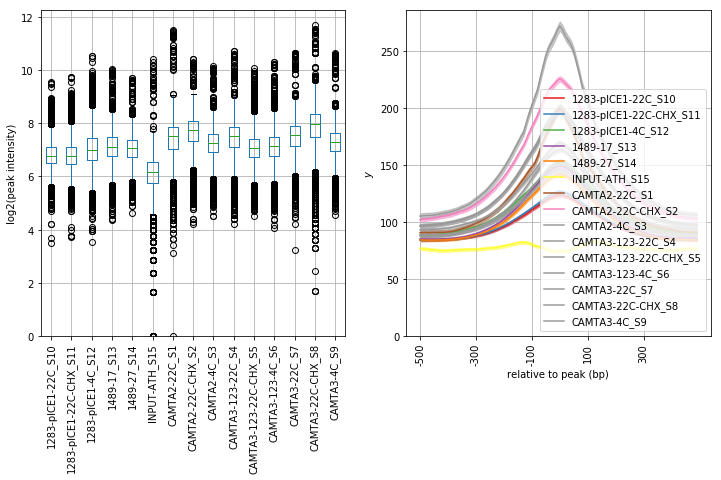

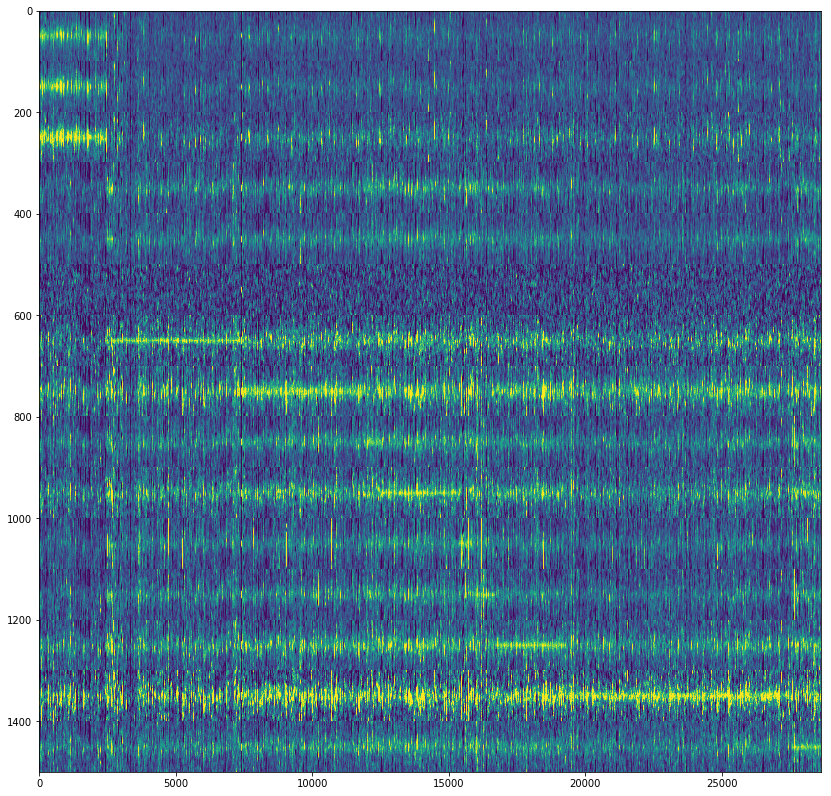

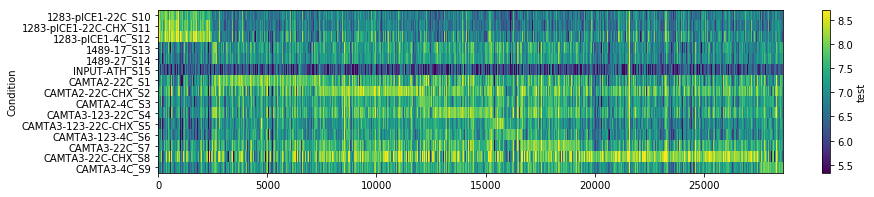

In [36]:
%env STATIC_ROOT=$PWD
__file__ = '/home/feng/figureScript/1119_CAMTA_194C.py'
execfile(__file__)

[ALI]= None
[qc_matrix]('Mean', -2.1185527644372892e-17)=('Std', 0.8885364976701239)=('Shape', (2862, 15))
[MSG] Now Fitting Model:None_normF=meanNorm_covarianceType=diag_randomState=None_maxIt=1000_fixMean=0_genre=DPGMM_nClu=25_stdPer=0
[SUCC] to fit Model:None_normF=meanNorm_covarianceType=diag_randomState=None_maxIt=1000_fixMean=0_genre=DPGMM_nClu=25_stdPer=0

Name:test
Converged:True
min_logL: 18521.710148
(lower-bound of) MEAN logL :18521.710148

 [WARN] unable to simplify condName. Exception:list index out of range

 [WARN] unable to simplify condName. Exception:list index out of range


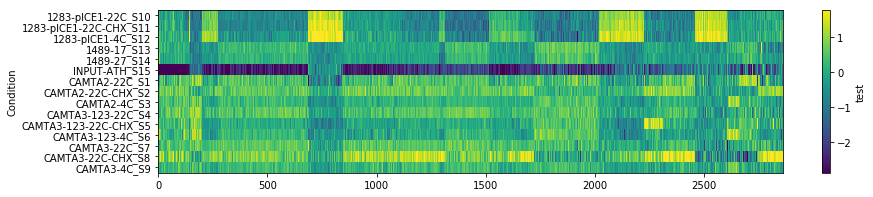

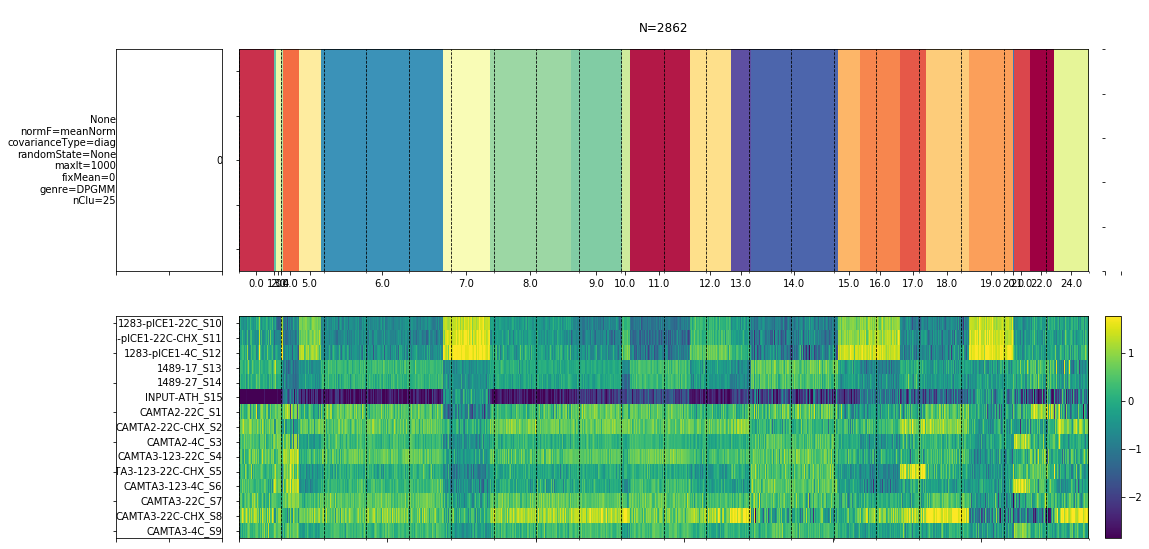

In [63]:
bwTrack,bwAvg = res[1]

dfc = scount.countMatrix(bwAvg)
dfc.qc_Avg()
dfcc = sutil.meanNorm(dfc.copy())
tdfc = dfcc.reindex(dfc.summary.query('per_SD>0.9').index)

mdl = sutil.fit_BGM(tdfc)

clu = mdl.predict()
clu.columns = ['clu']
vdf = tdfc.reindex(clu.sort_values('clu').index)
vdf.heatmap()
pp = spanel.panelPlot([clu,tdfc],show_axa=1,figsize=[18,9])
fig = pp.render(order=clu)

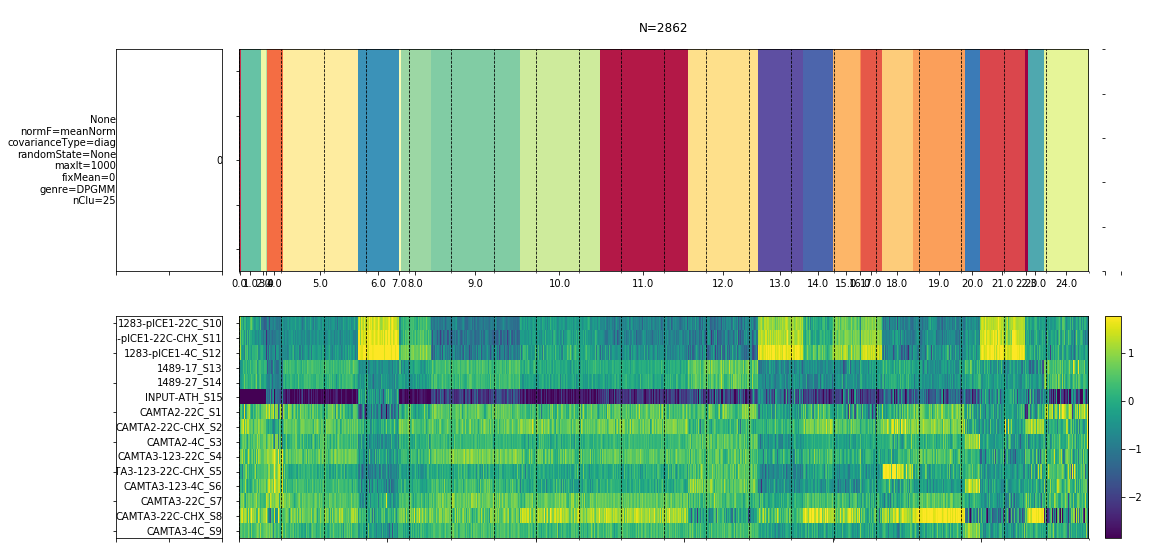

In [ ]:
res[1]

In [21]:
import synotil.jobs as sjob

In [43]:
bdc = dfs.pivot_table(columns='fname',values='FC',index=dfs.columns[0])
bdc.columns = bdc.columns.map(pyutil.basename)
bdc.to_csv('FCtable.csv')

In [47]:
! cp FCtable.csv -t /home/feng/syno3/PW_HiSeq_data/ChIP-seq/Mapped_data/189C/

In [51]:
bdc.columns

Index([u'type=closest_bed=1469-gELF3-myc-elf3-1xELF4-ox-ZT10-17C_S16_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=1469-gELF3-myc-elf3-1xELF4-ox-ZT10-27C_S17_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=4195-11-27C_S15_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=4195-8-1-17C_S12_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=4195-8-1-27C_S13_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=HDAC-22-4DAG_S18_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=HDAC-27-4DAG_S19_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=gELF3myc-17C_S10_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=pCAMTA2-22C-mock_S1_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey',
       u'type=closest_bed=pCAMTA3-22C-cycloheximide_S6_peaks_radius=1_feat=genes.gtf.cds_ty

In [54]:
vals = bdc['type=closest_bed=pCAMTA2-22C-mock_S1_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey']
vals.sort_values()[::-1]

feat_acc
AT5G64210    15.43881
AT5G64220    15.43881
AT1G06400     6.28356
AT1G06410     6.28356
AT3G27050     5.92217
AT3G27040     5.92217
AT3G21320     5.80171
AT1G17630     5.68125
AT1G17620     5.68125
AT1G09560     5.23436
AT1G09550     5.23436
AT3G04930     5.19939
AT2G38460     5.19939
AT3G04940     5.19939
AT2G38450     5.19939
AT2G45350     5.19939
AT4G39403     5.07893
AT4G18710     4.99730
AT1G07885     4.95846
AT1G07890     4.95846
AT5G20200     4.95846
AT1G07880     4.95846
AT5G56000     4.95241
AT5G56010     4.95241
AT5G56020     4.95241
AT1G13380     4.94235
AT1G13370     4.94235
AT4G08950     4.85300
AT4G08949     4.85300
AT3G55980     4.85300
               ...   
AT1G62630     0.00000
AT4G15100     0.00000
AT1G62690     0.00000
AT4G07932     0.00000
AT3G28660     0.00000
AT4G15056     0.00000
AT1G23660     0.00000
AT1G62110     0.00000
AT4G39840     0.00000
AT3G28500     0.00000
AT5G12323     0.00000
AT1G62200     0.00000
AT5G49500     0.00000
AT5G49510     0.00000
A

In [50]:
bdc = scount.countMatrix(bdc).fillna(0.)
bdc.qc_Avg()
bdc.summary.sort_values('per_M',ascending = False)

,CV,M,MSQ,SD,per_SD,per_M,per_MSQ,per_CV,per
feat_acc,,,,,,,,,
AT1G22767,1.305590,7.230052,141.377511,9.439484,0.999870,0.999981,0.999907,0.951346,0.999870
AT1G22770,1.316871,7.186269,141.198241,9.463391,0.999907,0.999944,0.999870,0.953165,0.999907
AT5G02820,1.200989,6.473851,102.361710,7.775022,0.999684,0.999907,0.999833,0.937201,0.999684
AT5G02810,1.206182,6.456115,102.322713,7.787252,0.999722,0.999870,0.999796,0.937238,0.999722
AT5G02811,1.210384,6.439312,102.211810,7.794041,0.999759,0.999833,0.999759,0.937275,0.999759
AT2G46790,1.170117,6.419969,97.647840,7.512113,0.999573,0.999796,0.999610,0.936904,0.999573
AT2G46787,1.176081,6.398398,97.565603,7.525032,0.999610,0.999759,0.999573,0.936941,0.999610
AT3G54890,1.219929,6.272668,97.902697,7.652211,0.999647,0.999722,0.999647,0.937386,0.999647
AT4G27300,1.275528,6.178645,100.286389,7.881036,0.999796,0.999684,0.999722,0.940913,0.999796


In [46]:
%%bash
cd  /home/feng/syno3/PW_HiSeq_data/ChIP-seq/Mapped_data/189C/


FCtable.csv
mapQC.log
S1
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S2
S3
S4
S5
S6
S7
S8
S9


In [69]:
%%bash
RUN=189C
FILES=`find npk/$RUN/ -type f | grep "CAMTA\|ICE1"`
echo $FILES
# ! wc -l $FILES
cat $FILES | bedtools sort | bedtools merge -c 4,5,6 -o first,median,first -i - \
        > ${RUN}-combined.bed

npk/189C/S6/pCAMTA3-22C-cycloheximide_S6_peaks.narrowPeak npk/189C/S9/pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peaks.narrowPeak npk/189C/S7/pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peaks.narrowPeak npk/189C/S4/pCAMTA3-22C-mock_S4_peaks.narrowPeak npk/189C/S1/pCAMTA2-22C-mock_S1_peaks.narrowPeak


In [73]:
! wc -l 189C-combined.bed

110698 189C-combined.bed


In [63]:
%%bash
wc -l npk/189C/S6/pCAMTA3-22C-cycloheximide_S6_peaks.narrowPeak npk/189C/S9/pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peaks.narrowPeak npk/189C/S12/4195-8-1-17C_S12_peaks.narrowPeak npk/189C/S19/HDAC-27-4DAG_S19_peaks.narrowPeak npk/189C/S7/pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peaks.narrowPeak npk/189C/S10/gELF3myc-17C_S10_peaks.narrowPeak npk/189C/S16/1469-gELF3-myc-elf3-1xELF4-ox-ZT10-17C_S16_peaks.narrowPeak npk/189C/S18/HDAC-22-4DAG_S18_peaks.narrowPeak npk/189C/S15/4195-11-27C_S15_peaks.narrowPeak npk/189C/S4/pCAMTA3-22C-mock_S4_peaks.narrowPeak npk/189C/S13/4195-8-1-27C_S13_peaks.narrowPeak npk/189C/S17/1469-gELF3-myc-elf3-1xELF4-ox-ZT10-27C_S17_peaks.narrowPeak npk/189C/S1/pCAMTA2-22C-mock_S1_peaks.narrowPeak

   56384 npk/189C/S6/pCAMTA3-22C-cycloheximide_S6_peaks.narrowPeak
   51541 npk/189C/S9/pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peaks.narrowPeak
   83742 npk/189C/S12/4195-8-1-17C_S12_peaks.narrowPeak
  133863 npk/189C/S19/HDAC-27-4DAG_S19_peaks.narrowPeak
   65633 npk/189C/S7/pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peaks.narrowPeak
   43472 npk/189C/S10/gELF3myc-17C_S10_peaks.narrowPeak
   63378 npk/189C/S16/1469-gELF3-myc-elf3-1xELF4-ox-ZT10-17C_S16_peaks.narrowPeak
     247 npk/189C/S18/HDAC-22-4DAG_S18_peaks.narrowPeak
   77000 npk/189C/S15/4195-11-27C_S15_peaks.narrowPeak
   76625 npk/189C/S4/pCAMTA3-22C-mock_S4_peaks.narrowPeak
   68200 npk/189C/S13/4195-8-1-27C_S13_peaks.narrowPeak
   41138 npk/189C/S17/1469-gELF3-myc-elf3-1xELF4-ox-ZT10-27C_S17_peaks.narrowPeak
   67273 npk/189C/S1/pCAMTA2-22C-mock_S1_peaks.narrowPeak
  828496 total


In [65]:
! wc -l 189C-combined.bed

491 189C-combined.bed


(110698, 6)
(22471, 6)


'score-GT-25189C-combined.bed'

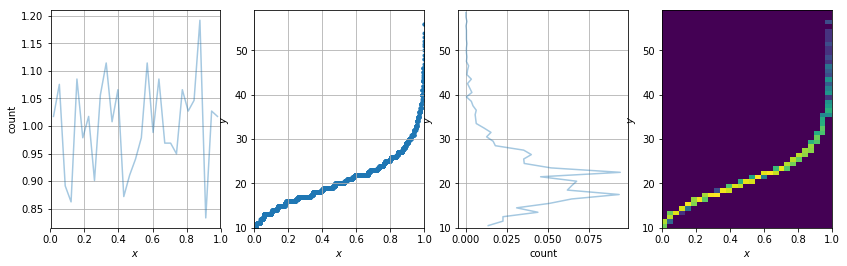

In [74]:
bedFile = '189C-combined.bed'
cbd=  sutil.extract_peak(bedFile)
# cbd.hist('score',bins=50)
per = pyutil.dist2ppf(cbd.score)
pyvis.qc_2var(per,cbd.score)
print cbd.shape
query = 'score>25'
# cbd = cbd.loc[per>0.9]
cbd = cbd.query(query)
print cbd.shape
sutil.to_tsv( cbd, pyutil.sanitise_query(query)+bedFile)
# ! wc *combined.bed

In [58]:
dfc=  sutil.extract_peak('189C-combined.bed')

In [60]:
bwFiles = ! find bw -type f | grep "CAMTA\|ICE1"
bwFiles

['bw/189C/S6/pCAMTA3-22C-cycloheximide_S6_RPGC.bw',
 'bw/189C/S9/pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_RPGC.bw',
 'bw/189C/S2/pCAMTA2-mock_S2_RPGC.bw',
 'bw/189C/S7/pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_RPGC.bw',
 'bw/189C/S5/pCAMTA3-4C-mock_S5_RPGC.bw',
 'bw/189C/S3/pCAMTA2-22C-cycloheximide_S3_RPGC.bw',
 'bw/189C/S4/pCAMTA3-22C-mock_S4_RPGC.bw',
 'bw/189C/S8/pICE1--ICE1-LD-22C-ZT0--4C-mock_S8_RPGC.bw',
 'bw/189C/S1/pCAMTA2-22C-mock_S1_RPGC.bw']

In [79]:
reload(synotil.dio)
reload(sutil)
bedFile ='score-GT-25189C-combined.bed'
bwTrack = sutil.extract_bigwig_multiple(fnames=bwFiles,bedFile=bedFile,NCORE=5,
                                        center_summit=1,
                                        radius=250,stepSize=5)

[WARN] Cannot find file:key.gene
[L] 22471
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100
[L]= 100



 [WARN] unable to simplify condName. Exception:'tuple' object has no attribute 'split'


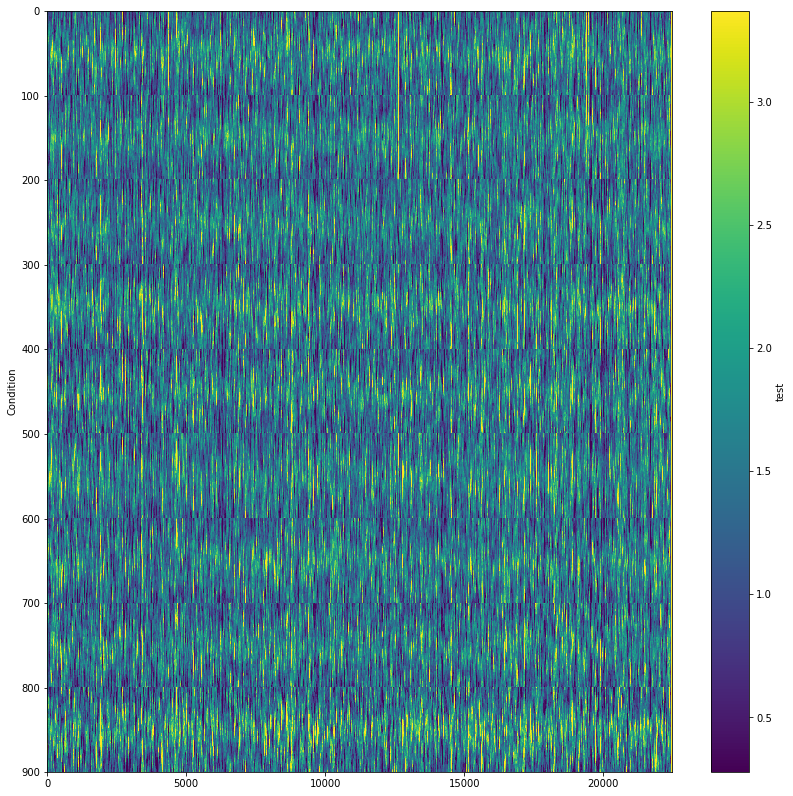

In [82]:
bwc = scount.countMatrix(bwTrack)
bwc.heatmap()

In [84]:
bwc = bwTrack

In [85]:
# ind = bwTrack.columns.levels[1]
# ind = ind[len(ind)//4:-len(ind)//4]
# print ind

# bwc = bwTrack.reindex(columns = bwTrack.columns.reindex(ind,level=1,)[0])

# pyvis.heatmap(bwc,vlim = pyutil.span(bwc,98.))


 [WARN] unable to simplify condName. Exception:list index out of range

 [WARN] unable to simplify condName. Exception:list index out of range

 [WARN] unable to simplify condName. Exception:list index out of range


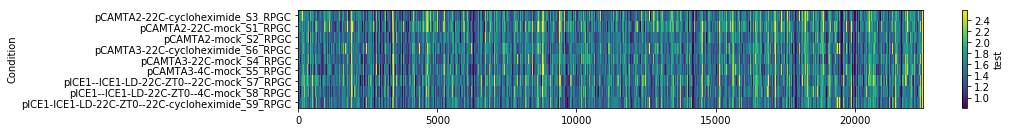

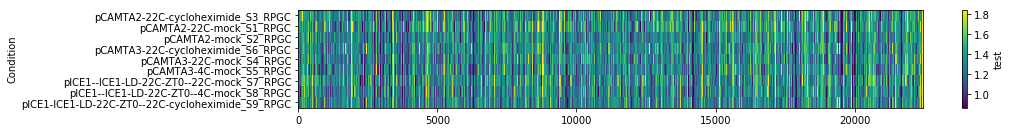

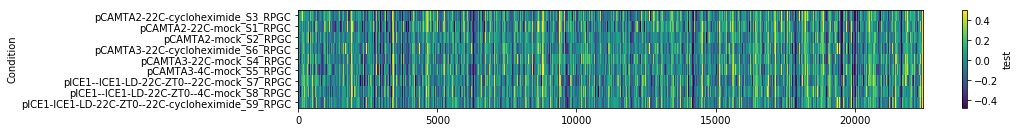

In [91]:
dfc = pyutil.colGroupMean(bwc)
dfc = scount.countMatrix(dfc)
dfc.heatmap()
dfc = dfc.apply(sutil.log2p1)
dfc.heatmap()
# dfc = dfc.transpose()
# dfcc = dfc.apply(sutil.meanNorm,axis=1)

dfcc = dfc.setDF(sutil.meanNorm(dfc.values,axis=0))
dfcc.columns = dfc.columns
# dfc=  sutil.meanNorm(dfc,axis=0)
dfcc.heatmap()


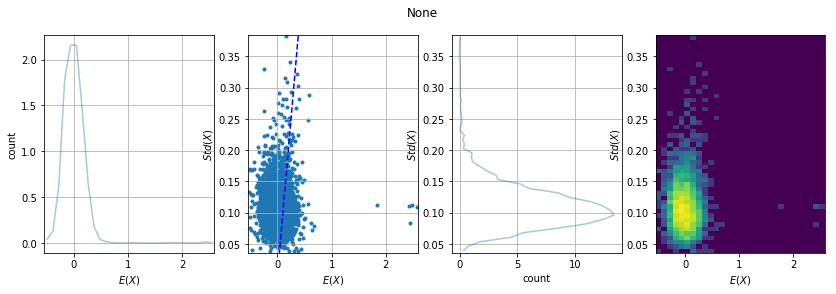

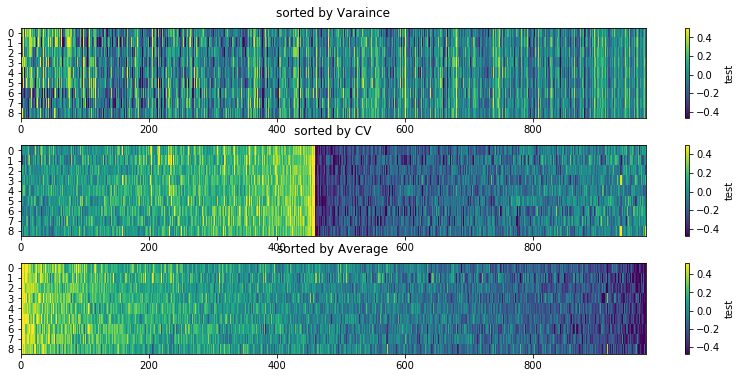

In [96]:
dfcc.qc_Avg()
sutil.qc_Sort(df=dfcc);

In [100]:
bed = sutil.extract_peak(bedFile)


,chrom,start,end,acc,score,strand
0,1,2149,2963,pCAMTA3-22C-mock_S4_peak_4,27.5,.
1,1,23156,23615,pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peak_12,29.5,.
2,1,23670,24360,pCAMTA3-22C-mock_S4_peak_19,35.0,.
3,1,27011,27119,pCAMTA2-22C-mock_S1_peak_16,31.0,.
4,1,30342,30442,pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peak_20,26.0,.


In [103]:
%%bash
envPull

cp: omitting directory '/home/feng/repos/synotil/src/config'


In [122]:
# # %%bash 
# ofname = ! . config_Ath_TAIR10.sh;  filterByCDS.py -g $GSIZE -c $GTF.cds score-GT-25189C-combined.bed -s1 
# ofname = ofname[-1]

# peak2gene = pyutil.readData(ofname)
# mdf= peak2gene[['feat_acc','acc']].merge(
#     dfcc.summary,left_on='acc',right_index=True).sort_values('per_SD',).iloc[::-1]
# mdf

# %%bash 
# ofname = ! 
cmd = '''
 . config_Ath_TAIR10.sh
filterByCDS.py  {bedFile}  -g $GSIZE -c $GTF.cds -s1 
'''.format(**locals())
res = pyutil.shellexec(cmd).splitlines()
ofname = res[-1]

peak2gene = pyutil.readData(ofname,guess_index=0)
mdf= peak2gene[['feat_acc','acc']].merge(
    dfcc.summary,left_on='acc',right_index=True).sort_values('per_SD',).iloc[::-1]
mdf


 . config_Ath_TAIR10.sh
filterByCDS.py  score-GT-25189C-combined.bed  -g $GSIZE -c $GTF.cds -s1 



,feat_acc,acc,CV,M,MSQ,SD,per_SD,per_M,per_MSQ,per_CV,per
chrom,,,,,,,,,,,
1,AT1G27730,pCAMTA3-22C-cycloheximide_S6_peak_6037,0.917025,0.602222,0.667654,0.552253,0.999844,0.997041,0.997664,0.768924,0.999844
4,AT4G27270,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.132868,0.445838,0.453872,0.505075,0.999755,0.993169,0.996952,0.805416,0.999755
4,AT4G27280,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.132868,0.445838,0.453872,0.505075,0.999755,0.993169,0.996952,0.805416,0.999755
1,AT1G07135,pCAMTA3-22C-cycloheximide_S6_peak_1496,1.136379,0.435142,0.433865,0.494486,0.999666,0.992501,0.996774,0.805994,0.999666
5,AT5G42380,pCAMTA3-22C-cycloheximide_S6_peak_50535,1.179935,0.418579,0.419141,0.493896,0.999622,0.990588,0.996685,0.812403,0.999622
4,AT4G02380,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.539265,0.317683,0.340041,0.488998,0.999577,0.970295,0.995261,0.855213,0.999577
3,AT3G44260,pCAMTA3-22C-cycloheximide_S6_peak_30429,0.834906,0.558804,0.529929,0.466548,0.999488,0.996373,0.997174,0.749700,0.999488
3,AT3G03280,pCAMTA2-22C-mock_S1_peak_28452,-1.599882,-0.277058,0.273241,0.443260,0.999444,0.037893,0.993480,0.155957,0.999444
5,AT5G20230,pCAMTA2-22C-mock_S1_peak_56894,1.455368,0.291597,0.265129,0.424381,0.999355,0.958814,0.993035,0.846847,0.999355


In [121]:
peak2gene = pyutil.readData(ofname)

In [97]:
dfcc.summary.sort_values('per_SD',ascending=False)

,CV,M,MSQ,SD,per_SD,per_M,per_MSQ,per_CV,per
pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peak_19557,2.674426,0.215883,0.379955,0.577364,0.999978,0.901228,0.996151,0.914979,0.999978
pCAMTA3-22C-cycloheximide_S6_peak_31678,1.955848,0.284205,0.389756,0.555863,0.999933,0.955120,0.996373,0.884852,0.999933
pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peak_38583,1.373969,0.402548,0.467953,0.553089,0.999889,0.988897,0.996996,0.838258,0.999889
pCAMTA3-22C-cycloheximide_S6_peak_6037,0.917025,0.602222,0.667654,0.552253,0.999844,0.997041,0.997664,0.768924,0.999844
pCAMTA3-22C-mock_S4_peak_22414,3.839479,0.134477,0.284671,0.516321,0.999800,0.793400,0.994148,0.939099,0.999800
pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peak_36361,1.132868,0.445838,0.453872,0.505075,0.999755,0.993169,0.996952,0.805416,0.999755
pCAMTA3-22C-mock_S4_peak_49799,0.799480,0.627266,0.644951,0.501487,0.999711,0.997219,0.997530,0.740933,0.999711
pCAMTA3-22C-cycloheximide_S6_peak_1496,1.136379,0.435142,0.433865,0.494486,0.999666,0.992501,0.996774,0.805994,0.999666
pCAMTA3-22C-cycloheximide_S6_peak_50535,1.179935,0.418579,0.419141,0.493896,0.999622,0.990588,0.996685,0.812403,0.999622
pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_peak_32070,1.539265,0.317683,0.340041,0.488998,0.999577,0.970295,0.995261,0.855213,0.999577


In [111]:
mdf= peak2gene[['feat_acc','acc']].merge(
    dfcc.summary,left_on='acc',right_index=True).sort_values('per_SD',).iloc[::-1]
mdf

,feat_acc,acc,CV,M,MSQ,SD,per_SD,per_M,per_MSQ,per_CV,per
chrom,,,,,,,,,,,
1,AT1G27730,pCAMTA3-22C-cycloheximide_S6_peak_6037,0.917025,0.602222,0.667654,0.552253,0.999844,0.997041,0.997664,0.768924,0.999844
4,AT4G27270,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.132868,0.445838,0.453872,0.505075,0.999755,0.993169,0.996952,0.805416,0.999755
4,AT4G27280,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.132868,0.445838,0.453872,0.505075,0.999755,0.993169,0.996952,0.805416,0.999755
1,AT1G07135,pCAMTA3-22C-cycloheximide_S6_peak_1496,1.136379,0.435142,0.433865,0.494486,0.999666,0.992501,0.996774,0.805994,0.999666
5,AT5G42380,pCAMTA3-22C-cycloheximide_S6_peak_50535,1.179935,0.418579,0.419141,0.493896,0.999622,0.990588,0.996685,0.812403,0.999622
4,AT4G02380,pICE1-ICE1-LD-22C-ZT0--22C-cycloheximide_S9_pe...,1.539265,0.317683,0.340041,0.488998,0.999577,0.970295,0.995261,0.855213,0.999577
3,AT3G44260,pCAMTA3-22C-cycloheximide_S6_peak_30429,0.834906,0.558804,0.529929,0.466548,0.999488,0.996373,0.997174,0.749700,0.999488
3,AT3G03280,pCAMTA2-22C-mock_S1_peak_28452,-1.599882,-0.277058,0.273241,0.443260,0.999444,0.037893,0.993480,0.155957,0.999444
5,AT5G20230,pCAMTA2-22C-mock_S1_peak_56894,1.455368,0.291597,0.265129,0.424381,0.999355,0.958814,0.993035,0.846847,0.999355


In [115]:
fname = '189C_DiffBound.csv'
mdf.to_csv(fname)
pyutil.MDFile(fname)

[189C_DiffBound.csv](189C_DiffBound.csv)


 [WARN] unable to simplify condName. Exception:list index out of range


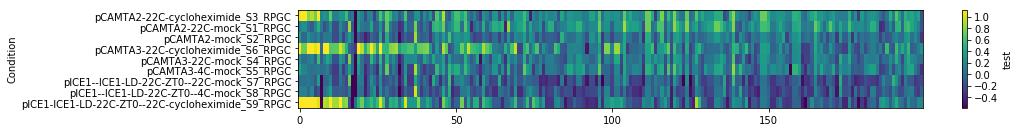

In [114]:
dfcc.reindex(mdf.acc[:200]).heatmap()

In [22]:
firstbykey

['chipTarg/189C/type=closest_bed=pICE1--ICE1-LD-22C-ZT0--22C-mock_S7_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=1469-gELF3-myc-elf3-1xELF4-ox-ZT10-27C_S17_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=4195-8-1-27C_S13_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=HDAC-27-4DAG_S19_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=4195-8-1-17C_S12_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=HDAC-22-4DAG_S18_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=gELF3myc-17C_S10_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=pCAMTA2-22C-mock_S1_peaks_radius=1_feat=genes.gtf.cds_type=firstByKey.tsv',
 'chipTarg/189C/type=closest_bed=1469-gELF3-myc-elf3-1xELF4-ox-ZT10-17C_S16_peaks_radius=1_feat=genes.gt